In [ ]:
import numpy as np
import pandas as pd

# Data Preprocessing

##Intro

Regardless of what machine learning or a neural network model you have, the data you use to train your algorithm is pivitol in determining its accuracy in both tests and inference (predictions based off of new data).

### What is it, and why is it important

When someone talks about preprocessing data, it means that they are formatting the data in a way of which machine learning models or deep learning models could understand them.

Preprocessing is similar to translating from one language to another, English to Dutch, etc.



### Thought experiment

When you look at a mango, how do you know it is a mango?

Well, you would say, that the mango is orange, its flesh is deep orange, the fruit has a high water content and it is sweet.

But then? How would a Machine learning model classify it?


In [ ]:
import pandas as pd

Mango_training = [{
    "Color": "Orange",
    "Flesh Color": "Deep Orange",
    "Water content": True,
    "Taste": "Sweet",
    "Name": "mango"
}] # To illustrate the need of preprocessing, let us try to train a random classification model on data that has not been preprocessed


df = pd.DataFrame(Mango_training) # Here I am turning the data into a dataframe

dfy = df["Name"] # Remembering the Data_exploration guide, the pandas library has a couple ways to help split Data
                 # Let us consider "Name" as a the target

df = df.iloc[:, :-1] # This splits the data as to have all columns except the Name column

print(df)
print(dfy)

    Color  Flesh Color  Water content  Taste
0  Orange  Deep Orange           True  Sweet
0    mango
Name: Name, dtype: object


In [ ]:
from sklearn.naive_bayes import GaussianNB # We are importing the model here

Is_mango = GaussianNB()  # Initialization

Is_mango.fit(df, dfy) # lets try to train the model on the data, and see what happens

ValueError: could not convert string to float: 'Orange'

As you see, you just get an error, you need to translate your data so that the model can understad it.

### What is it used for?

It enables you to ensure high accuracy of your data. Things involved within Preprocessing include:

- Handling missing data: Machine learning models require complete data, but real-world data is often incomplete.

- Removing noise and inconsistencies: Data might have errors or outliers that could mislead the model.

- Scaling and normalization: Features with different scales can negatively impact the model's performance.

- Converting categorical variables: Machine learning algorithms require numerical inputs, so categorical variables need to be transformed.

#####Scaling and Normalization

- Min-Max Scaling: Scales features to a range (e.g., 0 to 1), especially useful for algorithms like KNN and neural networks.

- Standardization (Z-score normalization): Scales features so they have a mean of 0 and a standard deviation of 1.

- Log Transformation: Converts skewed data distributions to a more normal distribution.

- Box-Cox Transformation: A more complex transformation to normalize data.

#### Encoding Categorical Data:

- Label Encoding: Assigns a unique number to each category (e.g., "red" becomes 0, "blue" becomes 1). This works well for ordinal categories.

- One-Hot Encoding: Converts each category into a separate binary column (e.g., a column for "red", "blue", etc.). This is suitable for nominal categories where the order does not matter.

####Feature Engineering

- Creating New Features: Sometimes, new features can be derived from existing ones. For example, creating interaction terms between variables.

- Feature Selection: Identifying and retaining the most relevant features while discarding less relevant or redundant ones using techniques like correlation matrices, LASSO regression, or recursive feature elimination.
Data Splitting:

- Train-Test Split: Dividing the dataset into training and testing subsets to evaluate the model's performance on unseen data.

- Cross-Validation: A technique where the dataset is split multiple times, and the model is trained and tested on different subsets to ensure generalization.

In [ ]:
#Pandas, Scikit-learn and NumPy are great preprocessing tools

### Scikit-learn

Scikit-learn is a powerful and widely used open-source Python library for machine learning. It provides simple and efficient tools for data analysis and modeling, making it ideal for tasks such as classification, regression, clustering, and dimensionality reduction.

Documentation: https://scikit-learn.org/dev/user_guide.html

#### Most used tools for Data Preprocessing

##### SimpleImputer

When training your machine learning model on data, your dataframe will likely have some NaN values.

It’s not always best to remove data with missing values, so the next best option is to fill in the missing values with something similar to what the real value would be.

Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
from sklearn.impute import SimpleImputer # This is the import for the tool

S_I = SimpleImputer(missing_values=np.nan, strategy='mean') # Before utilization of anything within a library, you must initialize it.

hole_Test_data = [[1,2,3], [5, np.nan, 8], [7, 8, 9], [3, np.nan, 6]]

S_I.fit(hole_Test_data)# Fit the data with holes on this function.

X = [[7,8,3], [2, np.nan, 8], [5, 8, 1], [3, np.nan, 6]]  #  As you trained this imputer, you now can fit in other data with holes, to fix them.

Filled_data = S_I.transform(X) # Transformation

print(Filled_data)

[[7. 8. 3.]
 [2. 5. 8.]
 [5. 8. 1.]
 [3. 5. 6.]]


#####Standard Scaler

When training your machine learning model, your data may have features with different scales. For example, one feature might represent age in years, while another represents income in thousands of dollars.

Algorithms like logistic regression or support vector machines perform better when features are on a similar scale. The StandardScaler helps by transforming the data so that each feature has a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model's learning process.

Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

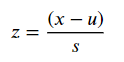

z -> z-score = a statistical measurement that describes a value's relationship to the mean of a group of values

x -> Data point

u -> The mean

σ -> standard deeviation


In [ ]:
from sklearn.preprocessing import StandardScaler # Import the standard scaler tool

Scaler = StandardScaler() # Initialize the standard scaler tool

Data = [[1,2,3], [3,2,1], [6,3,7]] # Example data

Scaler.fit(Data) # the fit gets the mean and std of your data

print(Scaler.transform(Data)) # transforms the data to center it and make your model more accurate


[[-1.13554995 -0.70710678 -0.26726124]
 [-0.16222142 -0.70710678 -1.06904497]
 [ 1.29777137  1.41421356  1.33630621]]


##### LabelEncoder

When working with categorical data in machine learning, your features may consist of labels like "red," "blue," or "green." However, most algorithms require numerical input rather than text.

The LabelEncoder helps by converting these categorical labels into numeric values. For example, "red" might be encoded as 0, "blue" as 1, and "green" as 2. This allows your model to interpret and process categorical features efficiently during training.

Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Here is some example data for an example of how to use the Label Encoder
Data = [
    {
        "name": "Green Gecko",
        "legs": "four legs",
        "type": "lizard",
        "color": "green",
        "teeth_shape": "sharp"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "red",
        "teeth_shape": "none"
    },
    {
        "name": "Chicken",
        "legs": "two legs",
        "type": "bird",
        "color": "white",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "green",
        "teeth_shape": "none"
    }]

df = pd.DataFrame(Data) # Here we are now turning it into a Pandas dataframe for easy manipulation and use

# Initialize LabelEncoders for each categorical feature.
# Each LabelEncoder must be initialized separately for each feature.
# If we reused the same LabelEncoder for different features, it could incorrectly assign the same numerical labels to different categories in those features.

le_name = LabelEncoder()
le_legs = LabelEncoder()
le_color = LabelEncoder()
le_teeth_shape = LabelEncoder()
le_type = LabelEncoder()

# Encode categorical features
df['name'] = le_name.fit_transform(df['name'])
df['legs'] = le_legs.fit_transform(df['legs'])
df['color'] = le_color.fit_transform(df['color'])
df['teeth_shape'] = le_teeth_shape.fit_transform(df['teeth_shape'])
df['type'] = le_type.fit_transform(df['type'])


df

,name,legs,type,color,teeth_shape
0,2,0,2,0,1
1,0,1,1,1,0
2,1,2,0,2,0
3,0,1,1,0,0


##### OneHotEncoder

When dealing with categorical data, some features may have multiple categories, such as "dog," "cat," or "bird." However, machine learning models often struggle with directly interpreting these as numbers, especially when there’s no inherent order between the categories.

The OneHotEncoder solves this by creating a separate binary column for each category. For example, instead of assigning numbers to "dog," "cat," and "bird," the encoder creates three columns: one for "dog," one for "cat," and one for "bird," where a value of 1 represents the presence of that category and 0 represents its absence. This prevents the model from assuming any ordinal relationship between the categories.

Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Let us first create a dataframe of catagorical data and turn it into a dataframe
Words = {'Words': ["Hospital", "clinic", "infirmary", "Urgency", "immediate"]}
Words_df = pd.DataFrame(Words)

# To use OneHotEncoder, we first need to initialize it.
# The reason we set "sparse_output" to false is because we do not want our sparse matrix  -- where a majority of its values are zero -- in a CSR format
Ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the data, this is a quick way for us to implement this encoder

Words_Processed = Ohe.fit_transform(Words_df[['Words']])  # Ensure 'Words' is passed as a DataFrame

# Create a DataFrame from the encoded data with proper column names
Words_processed_df = pd.DataFrame(Words_Processed, columns=Ohe.get_feature_names_out(['Words']))

# Display the result
Words_processed_df


,Words_Hospital,Words_Urgency,Words_clinic,Words_immediate,Words_infirmary
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


#####Normalization

When working with data, the scale of individual samples (rows) may vary significantly, which can affect the performance of machine learning models that rely on distance calculations, like k-nearest neighbors or clustering algorithms.

Normalization helps by scaling each sample to have a unit norm, meaning the length (or magnitude) of the sample's feature vector becomes 1. This ensures that differences in magnitude between samples do not dominate the model’s learning process, making the model more focused on the direction of the feature vectors rather than their scale.

Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.normalize.html

In [ ]:
from sklearn.preprocessing import normalize

X = [[5,-6,1], [1,1,1], [6,7,8]] # Here is the data we will be normalizing

normalize(X) # Normalization itself specifically scales each sample to a unit norm, doing so helps the Machine learning model equally consider data and be less susceptible to outliers


array([[ 0.63500064, -0.76200076,  0.12700013],
       [ 0.57735027,  0.57735027,  0.57735027],
       [ 0.49153915,  0.57346234,  0.65538554]])

### Data Preprocessing | final steps

After you finish preprocessing your data, you then have to segment it into X and Y variables to put into your model